Incomplete Errors Data:
    Service Completion Year  #Shipments
0                     2022      260296
1                     2023      156279
2                     2024       82593
All Shipments Data:
    Service Completion Year  #Shipments
0                     2022     1841981
1                     2023     1563741
2                     2024      690830
Merged Data (Before Ratio Calculation):
    Service Completion Year  #Shipments_Incomplete  #Shipments_All
0                     2022                 260296         1841981
1                     2023                 156279         1563741
2                     2024                  82593          690830
Ratio Data (After Calculation):
    Service Completion Year  #Shipments_Incomplete  #Shipments_All  \
0                     2022                 260296         1841981   
1                     2023                 156279         1563741   
2                     2024                  82593          690830   

   Ratio (Incomplete + Erro

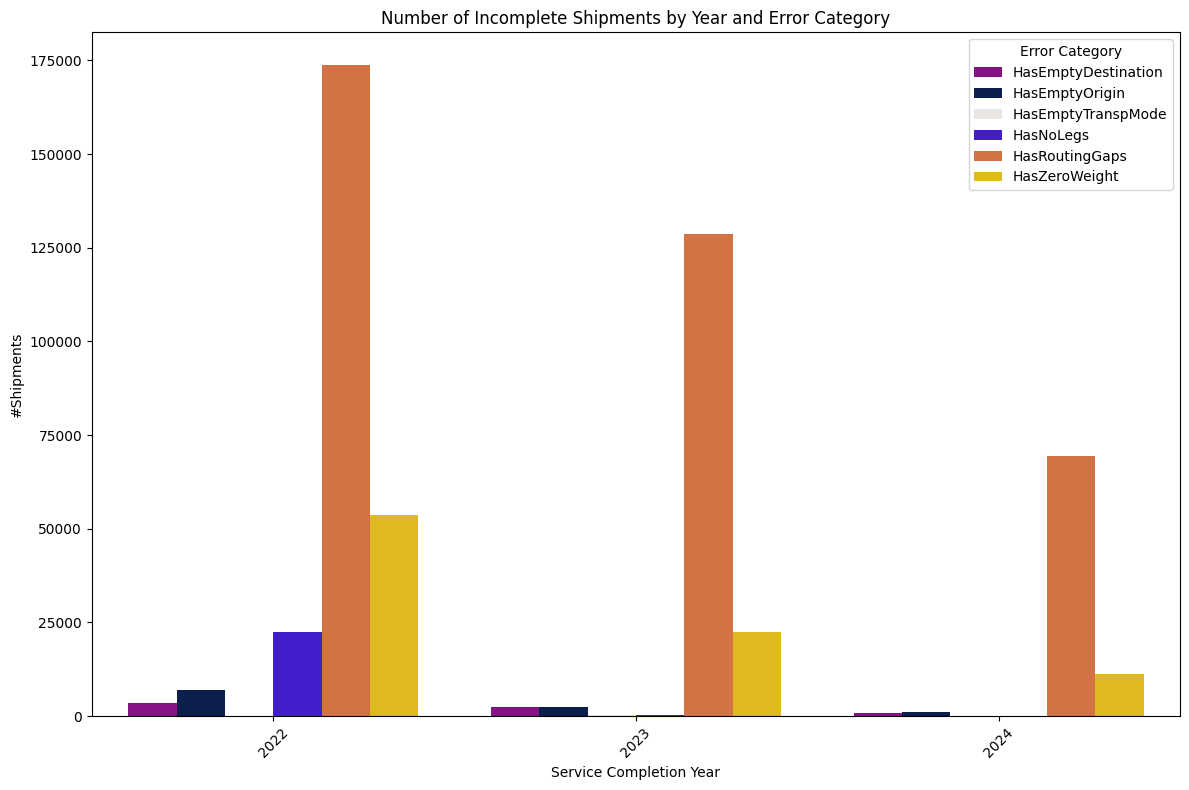

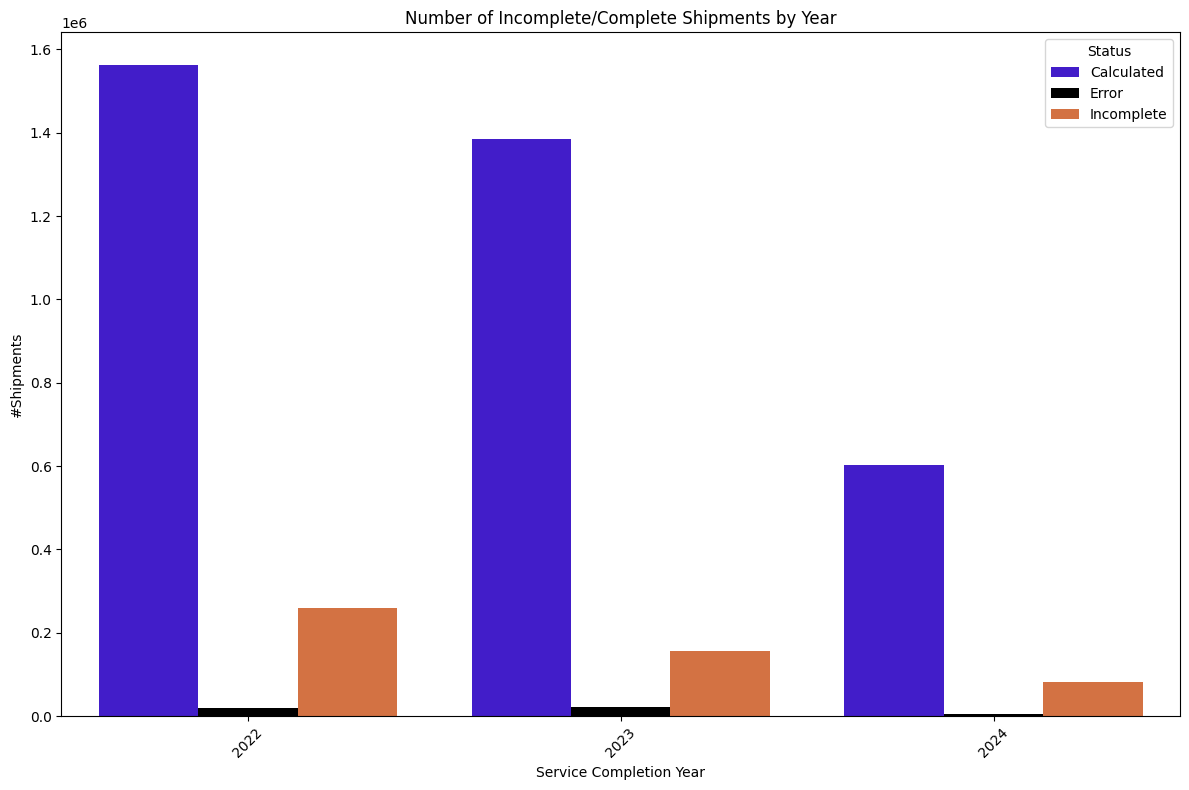

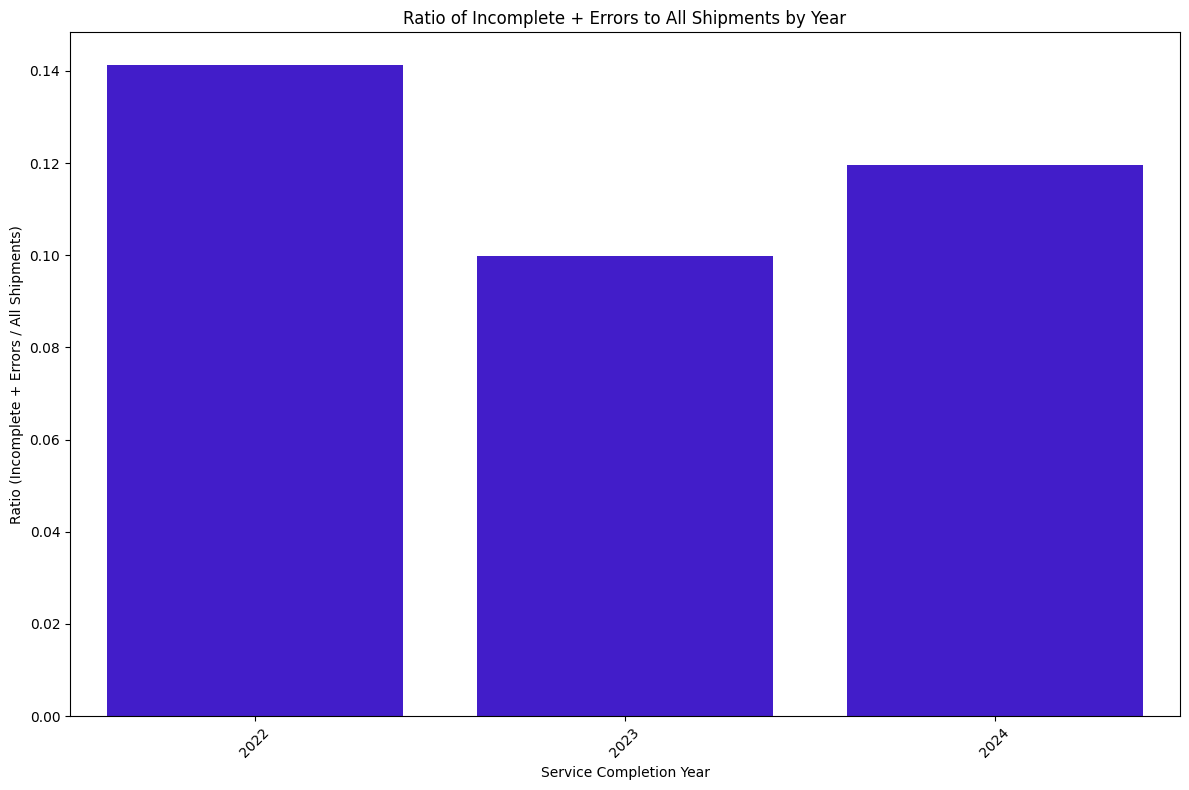

Tables and diagrams for incomplete, complete, and ratio of shipments have been created and saved.


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom color palette
custom_palette = {
    'HasNoLegs': '#3200E6',           # Geodis Blue
    'HasEmptyOrigin': '#011956',      # Dark Blue
    'HasEmptyDestination': '#990099', # Purpule
    'HasEmptyTranspMode': '#E9E5E2',  # Grey
    'HasRoutingGaps': '#EB692B',      # Orange
    'HasZeroWeight': '#ffcc00',       # Red
    'Incomplete': '#EB692B',          # Orange
    'Calculated': '#3200E6',          # Geodis Blue
}

# Read the Excel file into a pandas DataFrame
df = pd.read_excel('input_quality.xlsx')

# Ensure that the number of shipments is treated as a numeric column
df['#Shipments'] = df['#Shipments'].apply(lambda x: int(str(x).replace(',', '')))

# Aggregate the data by summing the number of shipments per year for incomplete statuses, preserving Error Category
incomplete_data = df[df['Status'] == 'Incomplete'].groupby(['Service Completion Year', 'Error Category'])['#Shipments'].sum().reset_index()

# Aggregate the data by summing the number of shipments per year and status
status_data = df.groupby(['Service Completion Year', 'Status'])['#Shipments'].sum().reset_index()

# Calculate the ratio of incomplete + errors to all shipments
# First, aggregate data for incomplete + errors
incomplete_errors_data = df[df['Status'] == 'Incomplete'].groupby(['Service Completion Year'])['#Shipments'].sum().reset_index()

# Aggregate data for all shipments
all_shipments_data = df.groupby(['Service Completion Year'])['#Shipments'].sum().reset_index()

print("Incomplete Errors Data:\n", incomplete_errors_data)
print("All Shipments Data:\n", all_shipments_data)

# Merge incomplete_errors_data and all_shipments_data
ratio_data = pd.merge(incomplete_errors_data, all_shipments_data, on='Service Completion Year', how='outer', suffixes=('_Incomplete', '_All'))

# Fill NaN values with 0
ratio_data = ratio_data.fillna(0)

print("Merged Data (Before Ratio Calculation):\n", ratio_data)

# Calculate the ratio, handling division by zero
ratio_data['Ratio (Incomplete + Errors / All Shipments)'] = ratio_data.apply(
    lambda row: row['#Shipments_Incomplete'] / row['#Shipments_All'] if row['#Shipments_All'] > 0 else 0, axis=1
)

print("Ratio Data (After Calculation):\n", ratio_data)

# Save the aggregated data to an Excel file
with pd.ExcelWriter('quality_summary.xlsx') as writer:
    df.to_excel(writer, sheet_name='All Data', index=False)
    incomplete_data.to_excel(writer, sheet_name='Incomplete Data', index=False)
    status_data.to_excel(writer, sheet_name='Status Data', index=False)
    ratio_data.to_excel(writer, sheet_name='Ratio Data', index=False)

# Define a function to create diagrams
def create_diagram(data, title, filename, hue_column=None):
    plt.figure(figsize=(12, 8))
    if hue_column:
        # Add missing keys to the custom palette to avoid errors
        unique_hues = data[hue_column].unique()
        for hue in unique_hues:
            if hue not in custom_palette:
                custom_palette[hue] = '#000000'  # Assign a default color (black) to missing keys
        sns.barplot(x='Service Completion Year', y='#Shipments', hue=hue_column, data=data, palette=custom_palette)
    else:
        sns.barplot(x='Service Completion Year', y='#Shipments', data=data, color=custom_palette['Geodis Blue'])
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

def create_ratio_diagram(data, title, filename):
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Service Completion Year', y='Ratio (Incomplete + Errors / All Shipments)', data=data, color=custom_palette['HasNoLegs'])  # Use the correct color from the palette
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

# Create and save diagram for incomplete shipments
create_diagram(incomplete_data, 'Number of Incomplete Shipments by Year and Error Category', 'incomplete_diagram.png', 'Error Category')

# Create and save diagram for incomplete/complete shipments by year
create_diagram(status_data, 'Number of Incomplete/Complete Shipments by Year', 'status_diagram.png', 'Status')

# Create and save diagram for the ratio of incomplete + errors to all shipments by year
create_ratio_diagram(ratio_data, 'Ratio of Incomplete + Errors to All Shipments by Year', 'ratio_diagram.png')

print("Tables and diagrams for incomplete, complete, and ratio of shipments have been created and saved.")


Ratio Data (After Calculation):
    Service Completion Year     Booking Type  #Shipments_Incomplete_Error  \
0                     2022           Manual                     167615.0   
1                     2022         eBooking                     111429.0   
2                     2023  General Booking                          7.0   
3                     2023           Manual                     108067.0   
4                     2023         eBooking                      70091.0   
5                     2024  General Booking                        245.0   
6                     2024           Manual                      56310.0   
7                     2024         eBooking                      30634.0   
8                     2022  General Booking                          0.0   

   #Shipments_All  Ratio (Incomplete + Errors / All Shipments in Booking Type)  
0         1211062                                           0.138403            
1          630918                           

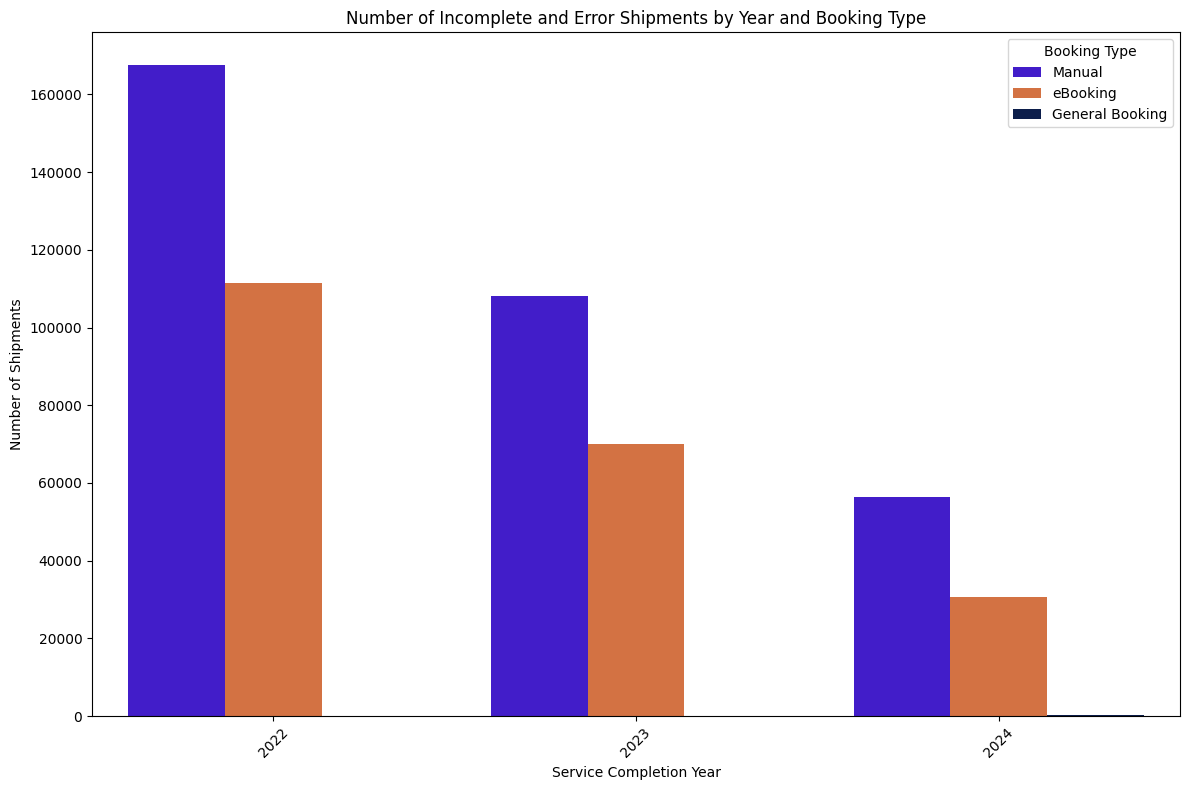

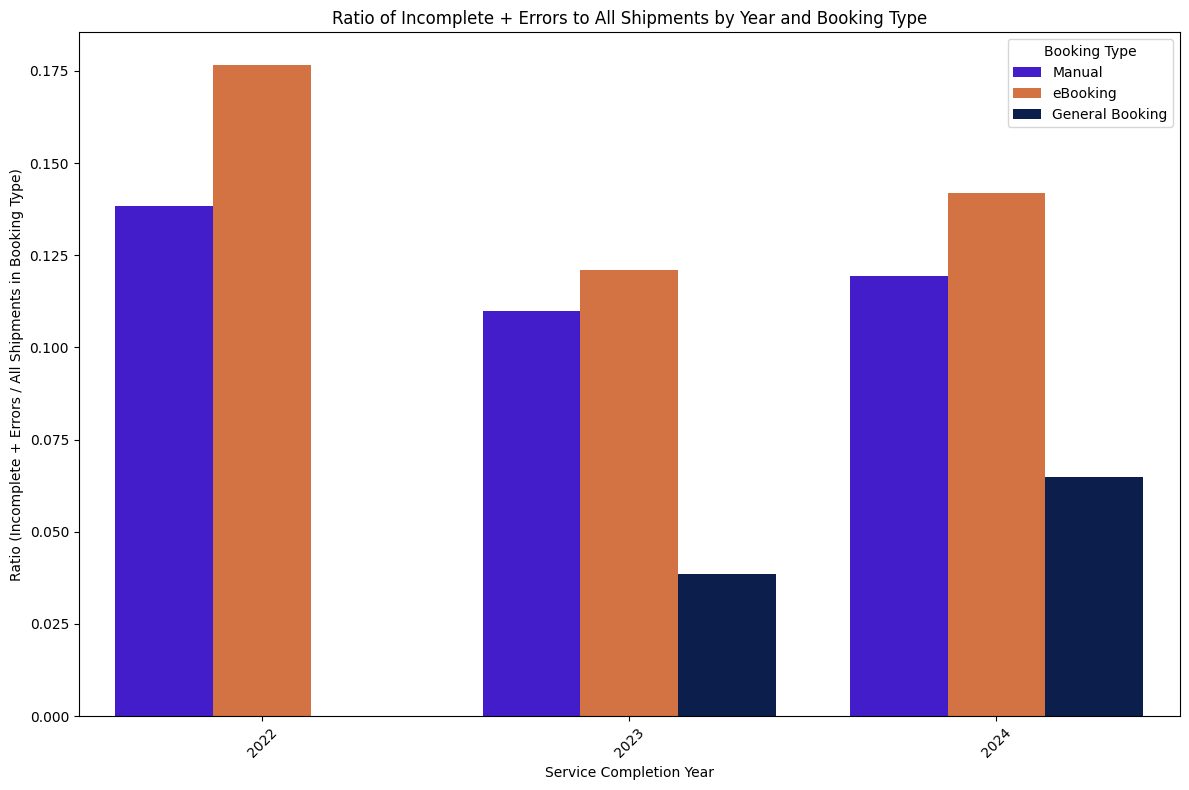

Diagrams for incomplete, error, and ratio of shipments by booking type have been created and saved.


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import load_workbook

# Define custom color palette for Booking Types
custom_palette_booking_type = {
    'Manual': '#3200E6',          # Geodis Blue
    'General Booking': '#011956', # Dark Blue
    'eBooking': '#EB692B',        # Orange
}

# Read the Excel file into a pandas DataFrame
df = pd.read_excel('input_quality.xlsx')

# Ensure that the number of shipments is treated as a numeric column
df['#Shipments'] = df['#Shipments'].apply(lambda x: int(str(x).replace(',', '')))

# Aggregate the data by summing the number of shipments per year and booking type for incomplete and error statuses
incomplete_error_data = df[df['Status'].isin(['Incomplete', 'Error'])].groupby(['Service Completion Year', 'Booking Type'])['#Shipments'].sum().reset_index()

# Aggregate the data by summing the number of shipments per year and booking type for all statuses
all_shipments_data = df.groupby(['Service Completion Year', 'Booking Type'])['#Shipments'].sum().reset_index()

# Merge the data to calculate the ratio
ratio_data = pd.merge(incomplete_error_data, all_shipments_data, on=['Service Completion Year', 'Booking Type'], how='outer', suffixes=('_Incomplete_Error', '_All'))

# Fill NaN values with 0
ratio_data = ratio_data.fillna(0)

# Calculate the ratio, handling division by zero
ratio_data['Ratio (Incomplete + Errors / All Shipments in Booking Type)'] = ratio_data.apply(
    lambda row: row['#Shipments_Incomplete_Error'] / row['#Shipments_All'] if row['#Shipments_All'] > 0 else 0, axis=1
)

print("Ratio Data (After Calculation):\n", ratio_data)

# Save the aggregated data to an Excel file
with pd.ExcelWriter('quality_summary.xlsx', engine='openpyxl') as writer:
    df.to_excel(writer, sheet_name='All Data', index=False)
    incomplete_error_data.to_excel(writer, sheet_name='Incomplete Error Data', index=False)
    all_shipments_data.to_excel(writer, sheet_name='All Shipments Data', index=False)
    ratio_data.to_excel(writer, sheet_name='Ratio Data', index=False)

# Define a function to create diagrams
def create_booking_type_diagram(data, title, filename, hue_column=None):
    plt.figure(figsize=(12, 8))
    if hue_column:
        sns.barplot(x='Service Completion Year', y='#Shipments', hue=hue_column, data=data, palette=custom_palette_booking_type)
    else:
        sns.barplot(x='Service Completion Year', y='#Shipments', data=data, color=custom_palette_booking_type['Manual'])  # Default to 'Manual' color
    plt.title(title)
    plt.xticks(rotation=45)
    plt.xlabel('Service Completion Year')
    plt.ylabel('Number of Shipments')
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

def create_ratio_diagram(data, title, filename):
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Service Completion Year', y='Ratio (Incomplete + Errors / All Shipments in Booking Type)', hue='Booking Type', data=data, palette=custom_palette_booking_type)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.xlabel('Service Completion Year')
    plt.ylabel('Ratio (Incomplete + Errors / All Shipments in Booking Type)')
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

# Create and save diagram for incomplete and error shipments by booking type
create_booking_type_diagram(incomplete_error_data, 'Number of Incomplete and Error Shipments by Year and Booking Type', 'booking_type_diagram.png', 'Booking Type')

# Create and save diagram for the ratio of incomplete + errors to all shipments within each booking type by year
create_ratio_diagram(ratio_data, 'Ratio of Incomplete + Errors to All Shipments by Year and Booking Type', 'booking_type_ratio_diagram.png')

print("Diagrams for incomplete, error, and ratio of shipments by booking type have been created and saved.")


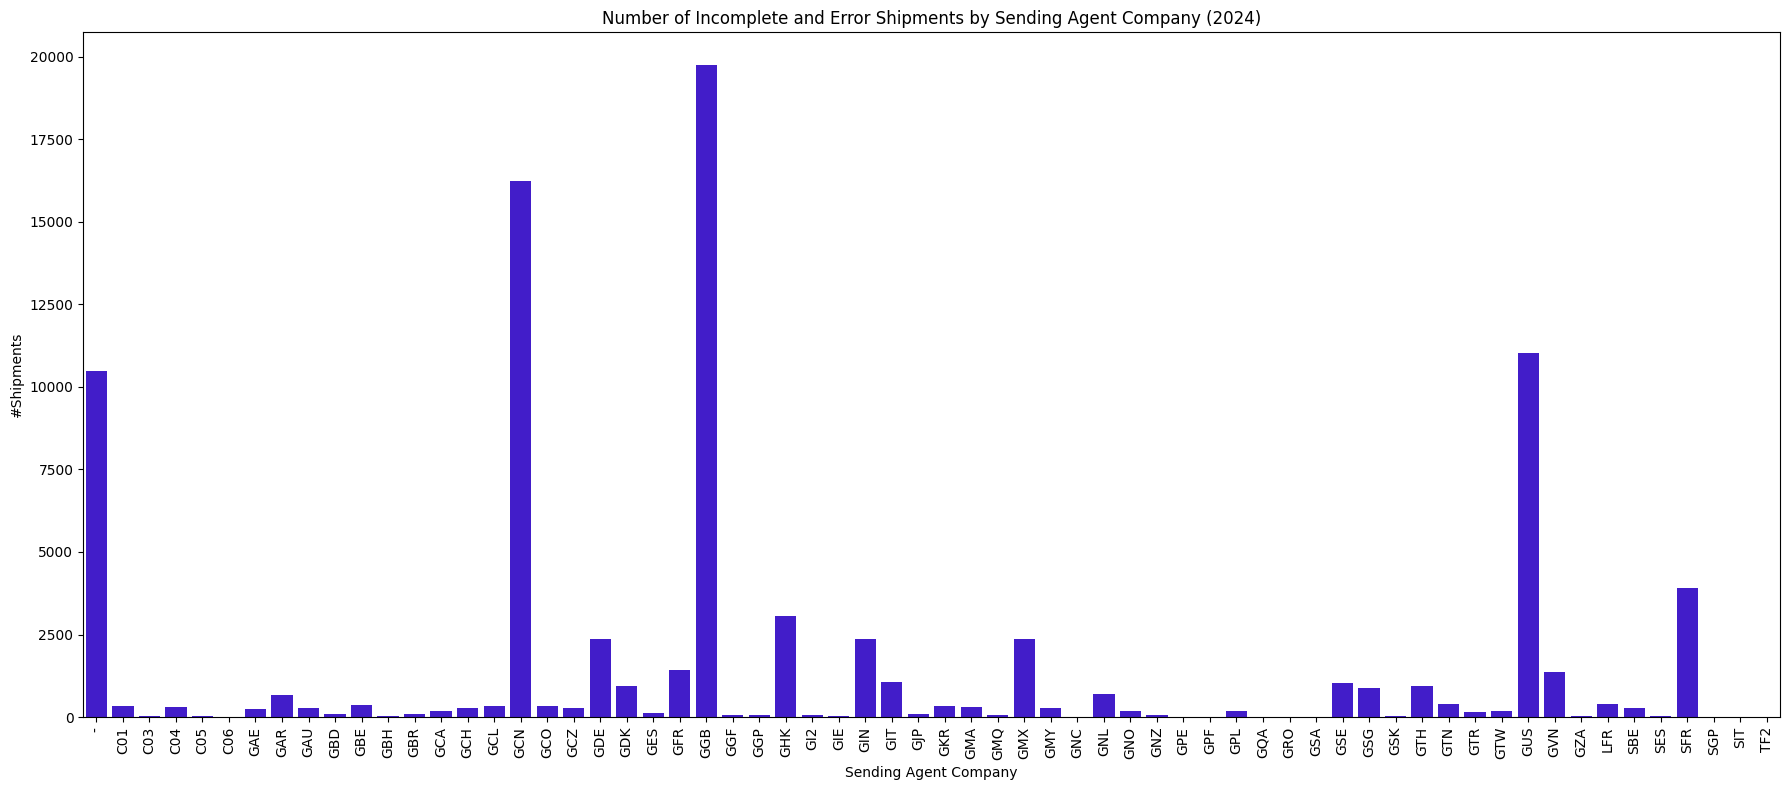

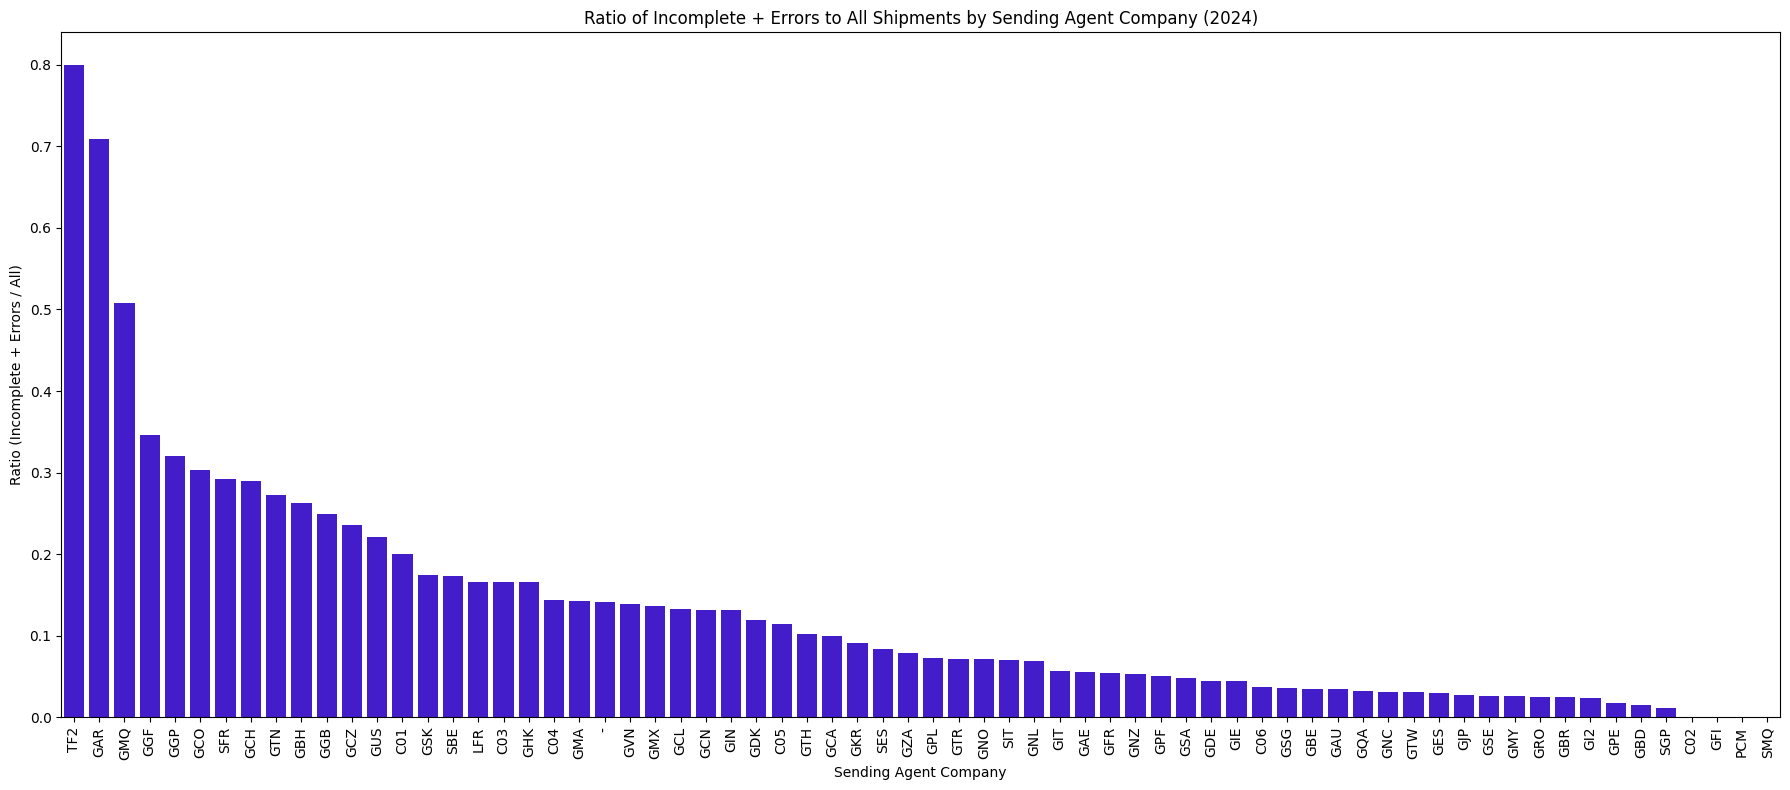

Diagrams for incomplete, error, and ratio of shipments by Sending Agent Company have been created and saved.


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import load_workbook

# Define a consistent color for all bars
consistent_color = '#3200E6'  # Geodis Blue

# Read the Excel file into a pandas DataFrame
df = pd.read_excel('input_quality.xlsx')

# Ensure that the number of shipments is treated as a numeric column
df['#Shipments'] = df['#Shipments'].apply(lambda x: int(str(x).replace(',', '')))

# Filter the data to only include 2024
df_2024 = df[df['Service Completion Year'] == 2024]

# Aggregate the data by summing the number of shipments per year and Sending Agent Company for incomplete statuses
incomplete_data = df_2024[df_2024['Status'] == 'Incomplete'].groupby(['Service Completion Year', 'Sending Agent Company'])['#Shipments'].sum().reset_index()

# Assuming 'Error' is another status we need to consider, here we'll sum them together
error_data = df_2024[df_2024['Status'] == 'Error'].groupby(['Service Completion Year', 'Sending Agent Company'])['#Shipments'].sum().reset_index()

# Combine incomplete and error data
incomplete_error_data = pd.merge(incomplete_data, error_data, on=['Service Completion Year', 'Sending Agent Company'], how='outer', suffixes=('_Incomplete', '_Error'))
incomplete_error_data = incomplete_error_data.fillna(0)
incomplete_error_data['#Shipments'] = incomplete_error_data['#Shipments_Incomplete'] + incomplete_error_data['#Shipments_Error']
incomplete_error_data = incomplete_error_data.drop(columns=['#Shipments_Incomplete', '#Shipments_Error'])

# Aggregate the data by summing the number of shipments per year and Sending Agent Company for all shipments
all_shipments_data = df_2024.groupby(['Service Completion Year', 'Sending Agent Company'])['#Shipments'].sum().reset_index()

# Merge the data to calculate the ratio
ratio_data = pd.merge(incomplete_error_data, all_shipments_data, on=['Service Completion Year', 'Sending Agent Company'], how='outer', suffixes=('_Incomplete_Error', '_All'))

# Fill NaN values with 0
ratio_data = ratio_data.fillna(0)

# Calculate the ratio, handling division by zero
ratio_data['Ratio (Incomplete + Errors / All)'] = ratio_data.apply(
    lambda row: row['#Shipments_Incomplete_Error'] / row['#Shipments_All'] if row['#Shipments_All'] > 0 else 0, axis=1
)

# Sort ratio_data by ratio from highest to lowest
ratio_data = ratio_data.sort_values(by='Ratio (Incomplete + Errors / All)', ascending=False)

# Save the aggregated data to an Excel file
with pd.ExcelWriter('quality_summary_sending_agent.xlsx', engine='openpyxl') as writer:
    df_2024.to_excel(writer, sheet_name='All Data', index=False)
    incomplete_error_data.to_excel(writer, sheet_name='Incomplete Error Data', index=False)
    all_shipments_data.to_excel(writer, sheet_name='All Shipments Data', index=False)
    ratio_data.to_excel(writer, sheet_name='Ratio Data', index=False)

# Define a function to create diagrams
def create_sending_agent_diagram(data, title, filename):
    plt.figure(figsize=(18, 8))
    sns.barplot(x='Sending Agent Company', y='#Shipments', data=data, color=consistent_color)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.xlabel('Sending Agent Company')
    plt.ylabel('#Shipments')
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

def create_ratio_diagram(data, title, filename):
    plt.figure(figsize=(18, 8))
    sns.barplot(x='Sending Agent Company', y='Ratio (Incomplete + Errors / All)', data=data, color=consistent_color)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.xlabel('Sending Agent Company')
    plt.ylabel('Ratio (Incomplete + Errors / All)')
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

# Create and save diagram for incomplete and error shipments by Sending Agent Company
create_sending_agent_diagram(incomplete_error_data, 'Number of Incomplete and Error Shipments by Sending Agent Company (2024)', 'sending_agent_incomplete_errors_diagram.png')

# Create and save diagram for the ratio of incomplete + errors to all shipments by Sending Agent Company
create_ratio_diagram(ratio_data, 'Ratio of Incomplete + Errors to All Shipments by Sending Agent Company (2024)', 'sending_agent_ratio_diagram.png')

print("Diagrams for incomplete, error, and ratio of shipments by Sending Agent Company have been created and saved.")
